<a href="https://colab.research.google.com/github/wendikardian/exercise_machine_learning/blob/main/Deployment_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wendikardian","key":"8c1011670f54dc1307d99bbedbf7767b"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle


kaggle.json


In [13]:
!kaggle datasets download -d vencerlanz09/sea-animals-image-dataste

 96% 300M/312M [00:03<00:00, 98.8MB/s]
100% 312M/312M [00:03<00:00, 84.7MB/s]


In [14]:
!mkdir sea-animals
!unzip -qq sea-animals-image-dataste.zip -d sea-animals



In [15]:
!ls sea-animals

 Clams	  Dolphin  'Jelly Fish'   Octopus   Puffers   'Sea Rays'      Shrimp	 Turtle_Tortoise
 Corals   Eel	    Lobster	  Otter     Seahorse  'Sea Urchins'   Squid	 Whale
 Crabs	  Fish	    Nudibranchs   Penguin   Seal       Sharks	      Starfish


In [21]:
import os

sea_animals_path = '/content/sea-animals/'
sea_animals_to_keep = ['Jelly Fish', 'Dolphin', 'Crabs']


all_animals = os.listdir(sea_animals_path)


selected_animals = [animal for animal in all_animals if animal in sea_animals_to_keep]

print(selected_animals)


['Jelly Fish', 'Dolphin', 'Crabs']


In [24]:
import os
sea_animals = os.path.join('/content/sea-animals/')
print(os.listdir(sea_animals))

['Jelly Fish', 'Dolphin', 'Crabs']


In [25]:
base_dir = '/content/sea-animals'
jelly_dir = os.path.join(base_dir,'Jelly Fish')
octopus_dir = os.path.join(base_dir,'Octopus')
crabs_dir = os.path.join(base_dir,'Crabs')

In [27]:
total_jelly = len(os.listdir(jelly_dir))
total_dolphin = len(os.listdir(dolphin_dir))
total_crabs = len(os.listdir(crabs_dir))

print("Jelly : ", total_jelly)
print("Dolphin : ", total_dolphin)
print("Crabs : ", total_crabs)

Jelly :  845
Dolphin :  782
Crabs :  499


In [28]:
from PIL import Image
total = 0

for x in selected_animals:
  dir = os.path.join(sea_animals, x)
  y = len(os.listdir(dir))
  print(x+':', y)
  total = total + y

  img_name = os.listdir(dir)
  for z in range(4):
    img_path = os.path.join(dir, img_name[z])
    img = Image.open(img_path)
    print('-',img.size)
  print('---------------')

print('\nTotal :', total)

Jelly Fish: 845
- (199, 300)
- (300, 200)
- (300, 225)
- (300, 169)
---------------
Dolphin: 782
- (300, 200)
- (300, 200)
- (300, 200)
- (300, 63)
---------------
Crabs: 499
- (300, 200)
- (300, 200)
- (248, 300)
- (300, 169)
---------------

Total : 2126


Jelly Fish: 845


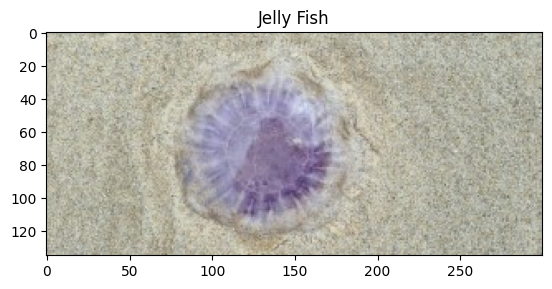

---------------
Dolphin: 782


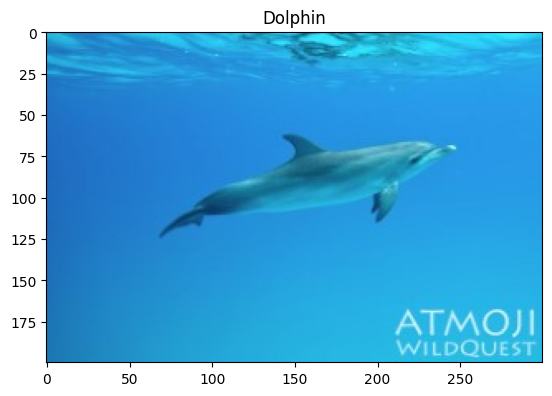

---------------
Crabs: 499


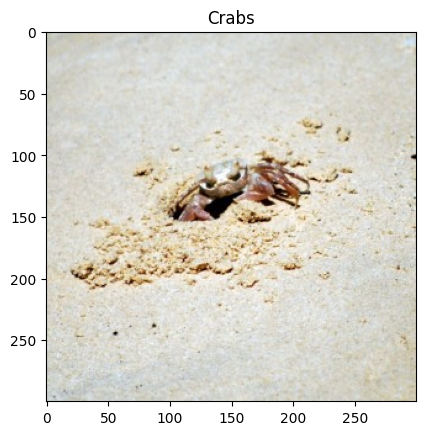

---------------

Total : 2126


In [29]:
from PIL import Image
import random
import matplotlib.pyplot as plt

total = 0

for x in selected_animals:
    dir = os.path.join(sea_animals, x)
    y = len(os.listdir(dir))
    print(x + ':', y)
    total += y

    random_image = random.choice(os.listdir(dir))
    random_image_path = os.path.join(dir, random_image)

    img = Image.open(random_image_path)

    plt.imshow(img)
    plt.title(x)
    plt.show()

    print('---------------')

print('\nTotal :', total)


In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)


In [31]:
val_size = 0.2
validation_datagen = ImageDataGenerator(
    rotation_range = 30,
    brightness_range = [0.2,1.0],
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest",
    rescale = 1./255,
    validation_split = val_size
)

In [32]:
batch_size = 256

data_train = train_datagen.flow_from_directory(
    sea_animals,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

data_val = validation_datagen.flow_from_directory(
    sea_animals,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 1702 images belonging to 3 classes.
Found 424 images belonging to 3 classes.


In [33]:
import tensorflow as tf


tf.device('/device:GPU:0')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 17, 17, 128)      

In [34]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.93 and logs.get('val_accuracy')>0.93):
      print("\nAccuracy > 93%!")
      self.model.stop_training = True

callbacks = myCallback()


In [35]:
history = model.fit(data_train, epochs = 50, steps_per_epoch = data_train.samples // batch_size, validation_data = data_val, validation_steps = data_val.samples // batch_size, verbose = 1, callbacks = [callbacks])

Epoch 1/50
6/6 [==============================] - 127s 20s/step - loss: 0.9584 - accuracy: 0.4578 - val_loss: 0.7550 - val_accuracy: 0.7344
Epoch 2/50
6/6 [==============================] - 131s 22s/step - loss: 0.6100 - accuracy: 0.7414 - val_loss: 0.4630 - val_accuracy: 0.8164
Epoch 3/50
6/6 [==============================] - 121s 20s/step - loss: 0.4360 - accuracy: 0.8472 - val_loss: 0.4202 - val_accuracy: 0.8125
Epoch 4/50
6/6 [==============================] - 128s 21s/step - loss: 0.4019 - accuracy: 0.8600 - val_loss: 0.4370 - val_accuracy: 0.8164
Epoch 5/50
6/6 [==============================] - 125s 20s/step - loss: 0.3741 - accuracy: 0.8631 - val_loss: 0.4130 - val_accuracy: 0.8203
Epoch 6/50
6/6 [==============================] - 131s 21s/step - loss: 0.3763 - accuracy: 0.8613 - val_loss: 0.4182 - val_accuracy: 0.8398
Epoch 7/50
6/6 [==============================] - 140s 23s/step - loss: 0.4052 - accuracy: 0.8506 - val_loss: 0.4578 - val_accuracy: 0.8164
Epoch 8/50
6/6 [====

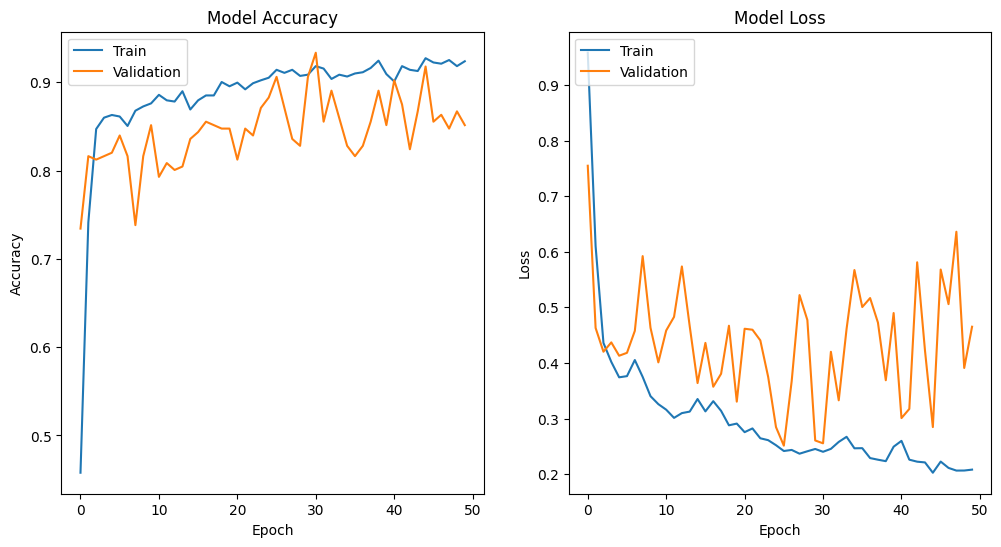

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [37]:

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [38]:
!ls -la | grep 'model'

-rw-r--r-- 1 root root  13898844 Dec 28 13:34 model.tflite
